# TME4: 

LE LORIER Yann

NGUYEN Hoang-Son

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import copy as cp

In [85]:
sous_ensembles = {
    "triangulaire" : [(0, 0), (1,0), (4,1), (6,0)],
    "trapezoidal" : [(0, 0), (1,0), (4,1), (6,1), (8,0)],
    "random" : [(0, 0), (1,0), (4,1), (6,0.6), (7,0.3), (9,1), (10, 0.5), (15,0)],
}

## Opérations de base

### Calculer le degré d'appartenance

In [86]:
def compute_membership(x, inflexion_points):
    for i in range(1, len(inflexion_points)):
        if x > inflexion_points[i][0]:
            continue
        else:
            m = (inflexion_points[i-1][1] - inflexion_points[i][1]) / (inflexion_points[i-1][0] - inflexion_points[i][0]) 
            b = inflexion_points[i][1] - m * inflexion_points[i][0]
            return m*x + b
        return 0

In [87]:
compute_membership(5, [(0, 0), (1,0), (4,1), (6,0.6), (7,0.3), (9,1), (10, 0.5), (15,0)])

0.8000000000000003

### Fonction de visualisation

In [88]:
def visualisation(name_ens, **kwargs):
    plt.figure()
    for key, value in kwargs.items():
        if name_ens is None or key in name_ens:
            x = []
            y = []
            for pt in value:
                x.append(pt[0])
                y.append(pt[1])
            plt.plot(x, y, label=key)
            plt.fill_between(x, y, alpha=0.3)
            plt.legend(loc="upper right")

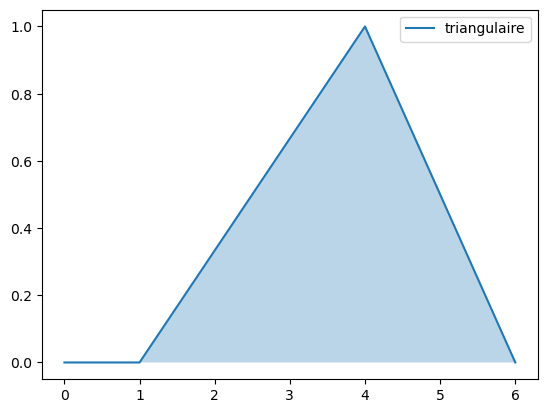

In [89]:
visualisation(name_ens=["triangulaire"], **sous_ensembles)

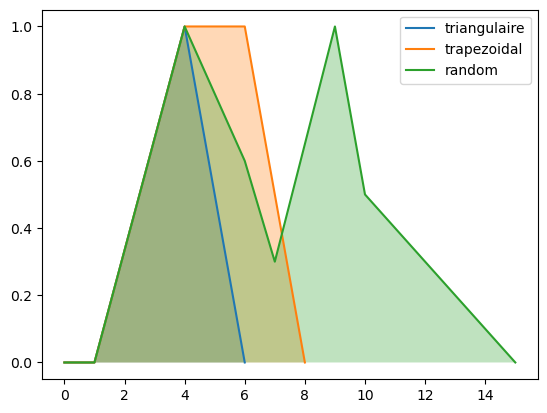

In [90]:
visualisation(name_ens=None, **sous_ensembles)

## Opérations ensemblistes

### Fonction Complémentaire

In [91]:
 def compute_complement(inflexion_points):
    return [(inflexion_points[i][0], 1-inflexion_points[i][1]) for i in range(len(inflexion_points))]

In [92]:
sous_ensembles["random_complementaire"] = compute_complement(sous_ensembles["random"])

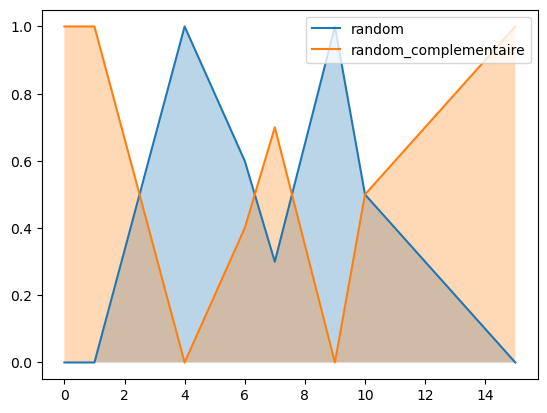

In [93]:
visualisation(name_ens=["random", "random_complementaire"], **sous_ensembles)

### T-normes et T-conormes

In [94]:
class T_norm:
    def __init__(self, type="probabiliste"):
        self.type = type
    
    def calculer(self, x ,y):
        if self.type == "probabiliste":
            return x*y
        if self.type == "lukasiewicz":
            return max(x+y-1,0)
        if self.type == "zadeh":
            return min(x, y)
        if self.type == "hamacher":
            if x == y and x == 0:
                return 0
            return (x*y)/(x+y-x*y)
        if self.type == "drastique":
            if x == 1:
                return y
            if y == 1:
                return x
            return 0
    
class TCoNorm:
    def __init__(self, type="probabiliste"):
        self.type = type
 
    def calculer(self, x, y):
        if self.type == 'probabiliste':
            return x+y-x*y
        elif self.type == 'lukasiewicz':
            return min(x+y, 1)
        elif self.type == 'zadeh':
            return max(x,y)
        elif self.type == 'hamacher':
            return (x+y)/ (1+x*y)
        elif self.type == 'drastique':
            if x == 0:
                return y
            elif y == 0:
                return x
            else:
                return 1
        else:
            return None

### Intersection et Union

In [66]:
def intersection(ensA, ensB, T_type, discretisation_step=100):
    t_fn = T_norm(type=T_type)
    if ensB is None: # si non -> complementaire
        ensB = compute_complement(ensA)
    all = np.array(ensA + ensB)
    x_min, x_max = np.min(all[:, 0]), np.max(all[:, 0])
    x_interval = np.linspace(x_min, x_max, num=discretisation_step)
    f_a = list(map(lambda x: compute_membership(x, ensA), x_interval))
    f_b = list(map(lambda x: compute_membership(x, ensB), x_interval))
    f_intersection = []
    for i, (a,b) in enumerate(zip(f_a, f_b)):
        f_intersection.append((x_interval[i], t_fn.calculer(a, b))) # ajouter la tuple (x, y), où y = T(f_a(x), f_b(x))
    return f_intersection

def union(ensA, ensB, T_type, discretisation_step=100):
    t_fn = TCoNorm(type=T_type)
    if ensB is None: # si non -> complementaire
        ensB = compute_complement(ensA)
    all = np.array(ensA + ensB)
    x_min, x_max = np.min(all[:, 0]), np.max(all[:, 0])
    x_interval = np.linspace(x_min, x_max, num=discretisation_step)
    f_a = list(map(lambda x: compute_membership(x, ensA), x_interval))
    f_b = list(map(lambda x: compute_membership(x, ensB), x_interval))
    f_intersection = []
    for i, (a,b) in enumerate(zip(f_a, f_b)):
        f_intersection.append((x_interval[i], t_fn.calculer(a, b))) # ajouter la tuple (x, y), où y = T(f_a(x), f_b(x))
    return f_intersection

### Représentation

#### triangulaire

##### Non-contradiction

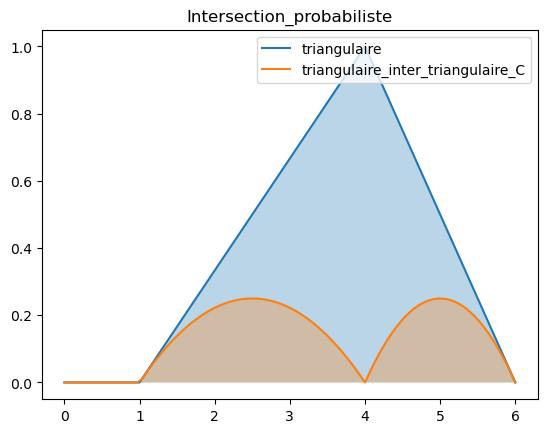

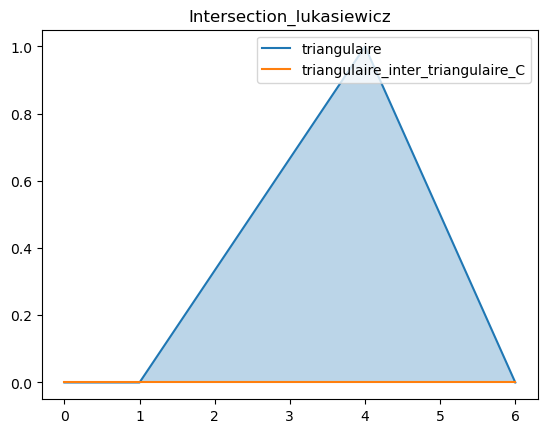

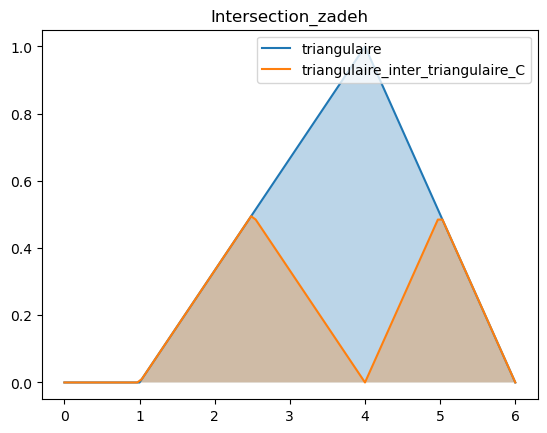

In [101]:
t_types = ["probabiliste", "lukasiewicz", "zadeh"]
ens_name = "triangulaire"
for t_type in t_types:
    inter = f"{ens_name}_inter_{ens_name}_C"
    sous_ensembles[f"{inter}"] = intersection(ensA=sous_ensembles[f"{ens_name}"], ensB=None, T_type=t_type)
    visualisation(name_ens=[ens_name, inter], **sous_ensembles)
    plt.title(f"Intersection_{t_type}")

<b>Remarques</b>
L'intersection avec le complément de chacun de ces ensembles est plus ou moins stricte. Le cas de l'intersection de Lukasiewicz, peut s'interpréter comme une intersection qui est vide entre deux ensembles qui sont trop différents. Ceci est normal, puisqu'il s'agit du complément. Pour les deux autres cas, il suffit d'analyser le calcul des compléments pour comprendre que l'intersection a un comportement similaire, à part de la non-linearité de l'intersection probabiliste.

#### Tiers exclu

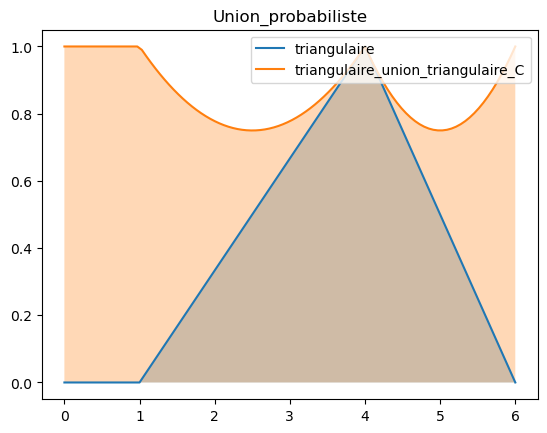

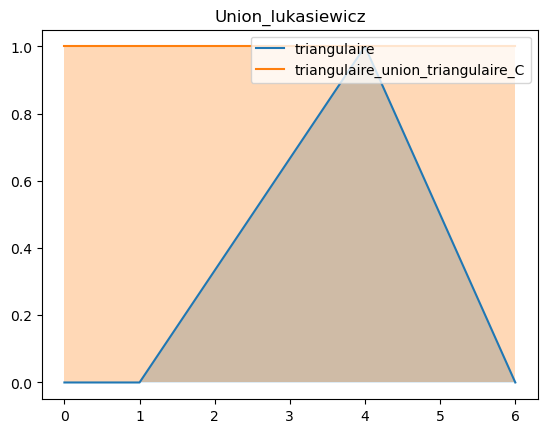

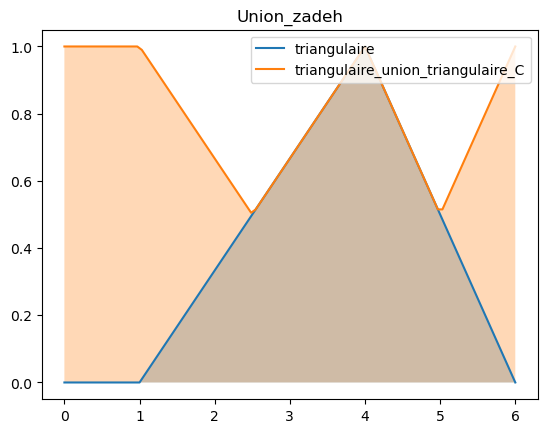

In [102]:
t_types = ["probabiliste", "lukasiewicz", "zadeh"]
ens_name = "triangulaire"
for t_type in t_types:
    uni = f"{ens_name}_union_{ens_name}_C"
    sous_ensembles[f"{uni}"] = union(ensA=sous_ensembles[f"{ens_name}"], ensB=None, T_type=t_type)
    visualisation(name_ens=[ens_name, uni], **sous_ensembles)
    plt.title(f"Union_{t_type}")

<b>Remarques</b>
Nous pouvons voir que pour l'union et l'intersection, la T-Norme et T-Conorme probabiliste donne des résultats non linéaires. Cette représentation de l'union est moins stricte que l'union de Zadeh, en observant l'aire totale couverte par l'union.

### Trapézoïdal

#### Non-contradiction

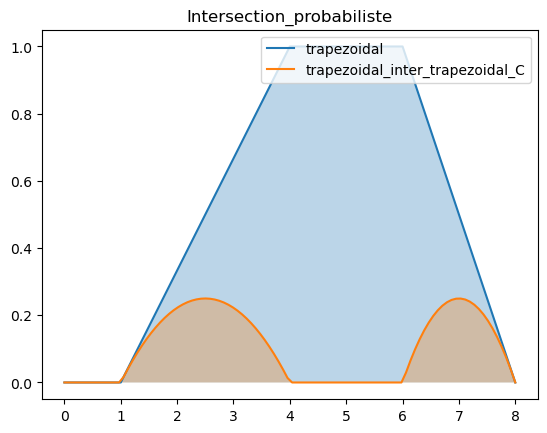

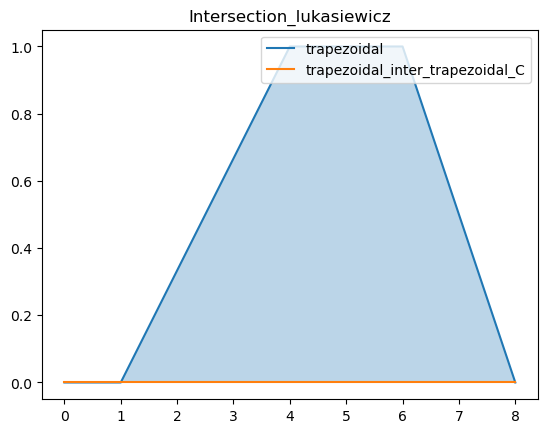

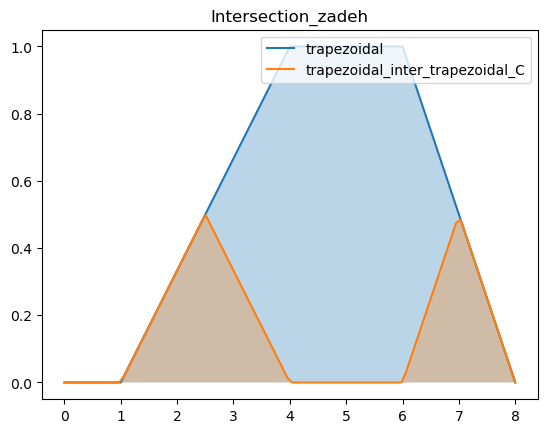

In [103]:
t_types = ["probabiliste", "lukasiewicz", "zadeh"]
ens_name = "trapezoidal"
for t_type in t_types:
    inter = f"{ens_name}_inter_{ens_name}_C"
    sous_ensembles[f"{inter}"] = intersection(ensA=sous_ensembles[f"{ens_name}"], ensB=None, T_type=t_type)
    visualisation(name_ens=[ens_name, inter], **sous_ensembles)
    plt.title(f"Intersection_{t_type}")

#### Tiers exclu

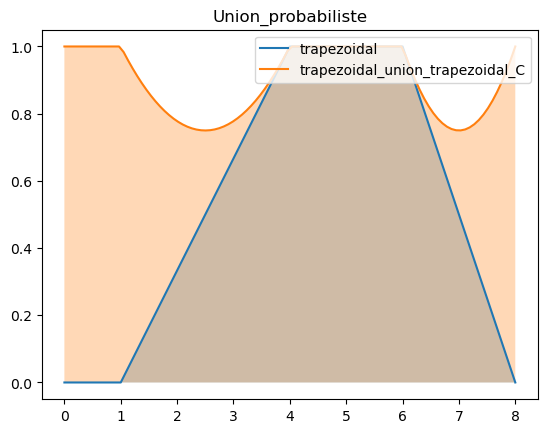

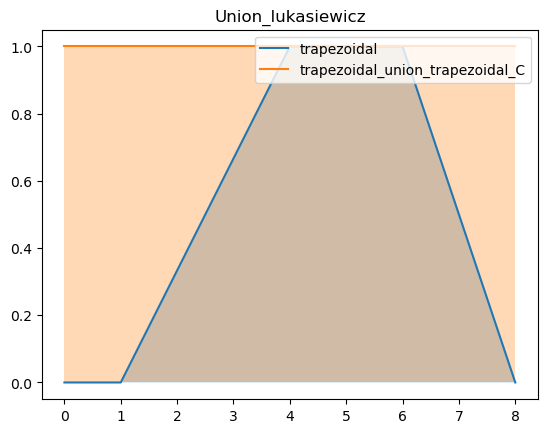

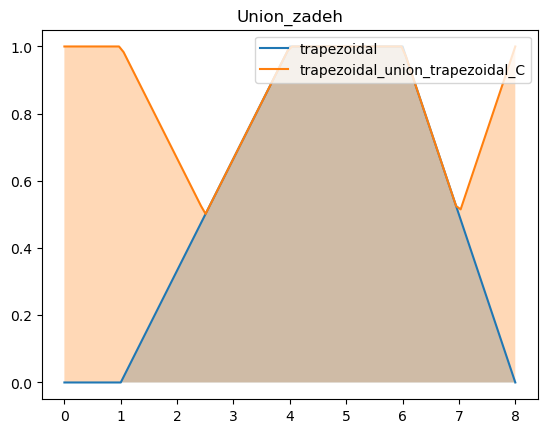

In [104]:
t_types = ["probabiliste", "lukasiewicz", "zadeh"]
ens_name = "trapezoidal"
for t_type in t_types:
    uni = f"{ens_name}_union_{ens_name}_C"
    sous_ensembles[f"{uni}"] = union(ensA=sous_ensembles[f"{ens_name}"], ensB=None, T_type=t_type)
    visualisation(name_ens=[ens_name, uni], **sous_ensembles)
    plt.title(f"Union_{t_type}")

### Random

#### Non-contradiction

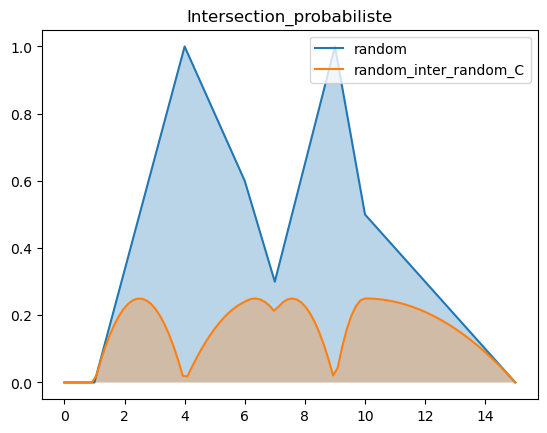

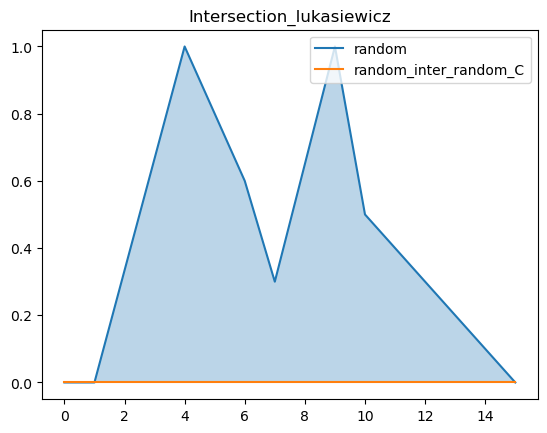

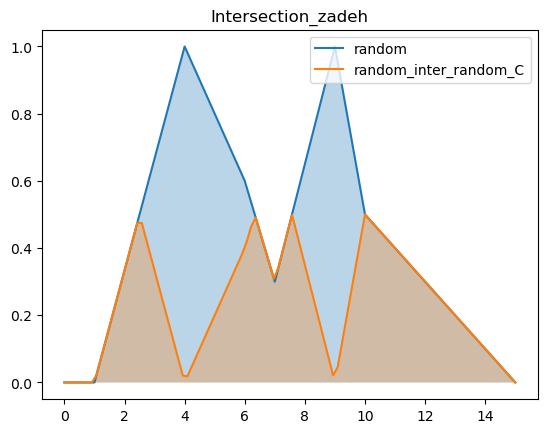

In [105]:
t_types = ["probabiliste", "lukasiewicz", "zadeh"]
ens_name = "random"
for t_type in t_types:
    inter = f"{ens_name}_inter_{ens_name}_C"
    sous_ensembles[f"{inter}"] = intersection(ensA=sous_ensembles[f"{ens_name}"], ensB=None, T_type=t_type)
    visualisation(name_ens=[ens_name, inter], **sous_ensembles)
    plt.title(f"Intersection_{t_type}")


#### Tiers exclu

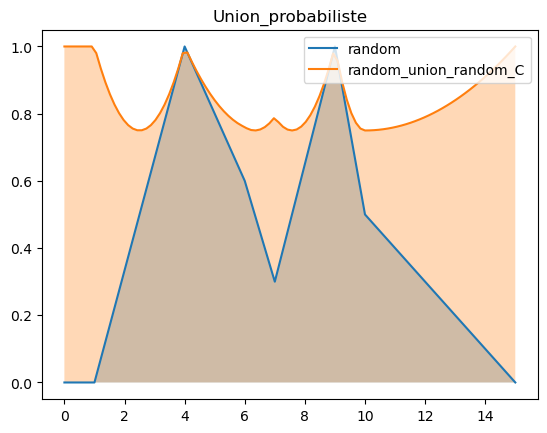

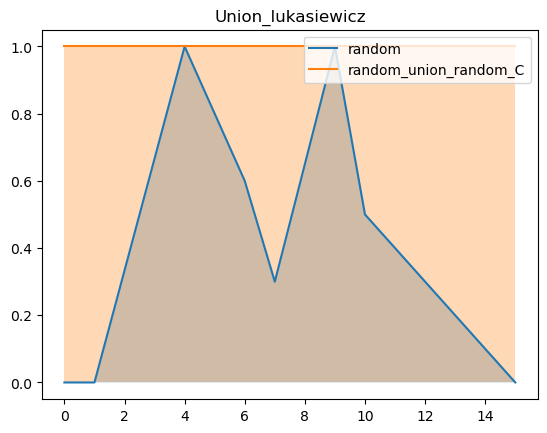

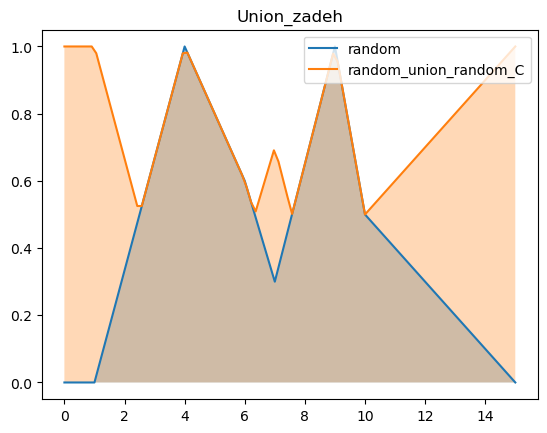

In [106]:
t_types = ["probabiliste", "lukasiewicz", "zadeh"]
ens_name = "random"
for t_type in t_types:
    uni = f"{ens_name}_union_{ens_name}_C"
    sous_ensembles[f"{uni}"] = union(ensA=sous_ensembles[f"{ens_name}"], ensB=None, T_type=t_type)
    visualisation(name_ens=[ens_name, uni], **sous_ensembles)
    plt.title(f"Union_{t_type}")

### Conclusions sur opérations ensemblistes

Nous avons étudié l'union et l'intersection de sous-ensembles flous.

Par intuition, en utilisant la T-Norme et la T-Conorme de Zadeh, il semble clair que l'union est facilement assimilable a un maximum entre deux ensembles, tandis que l'intersection est assimilable à un minimum entre deux ensembles. Il y a donc une préservation du principe de la non-contradiction, mais aussi du tiers exclu.

Dans le cas probabiliste, comme nous faisons une multiplication, nous générons forcément un ensemble non-linéaire. Cette non-linearité, cause que certains espaces de l'union ou de l'intersection ne soient pas couverts. 

Finalement, pour le cas de Lukasiewicz, nous avons le cas de l'union, qui est très permissive, ou bien le cas de l'intersection, qui est très stricte. Pour ce cas, nous cherchons deux ensembles flous qui ne soient pas trop différents les uns des autres. Comme nous réalisons des calculs entre des compléments, ceci explique l'abandon de la non-contradiction ou bien du tiers exclu.

# Principe d'extension

In [107]:
import ipdb
class FuzzyImage:
    def __init__(self, fn):
        self.fn = fn
        
    def calcule(self, x):
        return self.fn(x)
        
    def antecedent(self, y, set_):
        ants = []
        for x_i in set_:
            if self.calcule(x_i) == y:
                ants.append(x_i)
        return ants

def fn(x):
    return x * x

def extension(ensX, Y_s, phi):
    # ensX de la forme [(0,0), (1, 0.2), ...]
    # discretisation de l'espace
    interval_X = np.linspace(ensX[0][0], ensX[-1][0], 5)
    res = []
    for y in range(len(Y_s)):
        ants = phi.antecedent(Y_s[y], interval_X)
        if len(ants) == 0:
            res.append((y, 0))
            continue
        max_f_a = max([compute_membership(ant, ensX) for ant in ants])
        res.append((y, max_f_a))
    return res

In [108]:
phi = FuzzyImage(fn)

In [109]:
sous_ensembles['tme_4'] = [(0,0), (1, 0.3), (2, 0.4),(3, 1), (3.5, 0.7), (4, 0.2)]
Y_s = [3, 8, 9, 4]

res_Y = extension(sous_ensembles['tme_4'], Y_s, phi)

# Nous allons mettre les résultats dans un dictionnaire pour 
# pouvoir utiliser notre fonction de visualisation.
sef_A = {'f_A': sous_ensembles['tme_4']}
sef_B = {'f_B': res_Y}

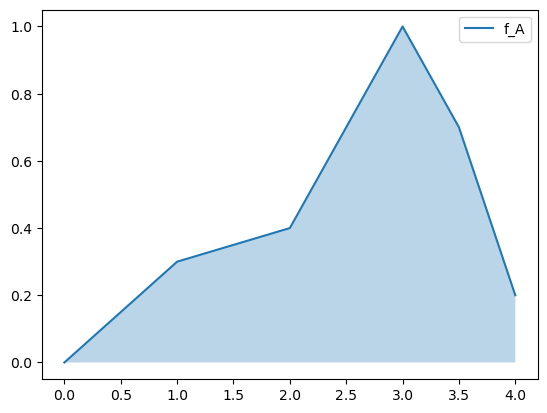

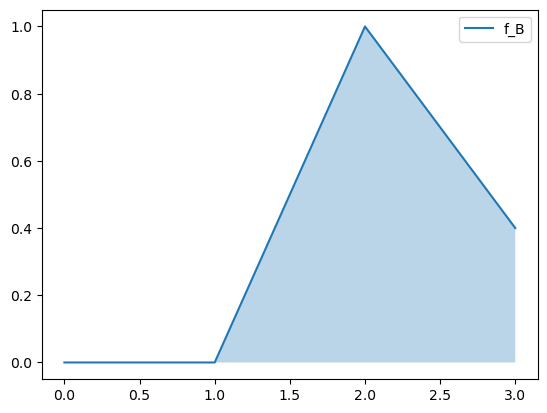

In [110]:
visualisation(name_ens=None, **sef_A)
visualisation(name_ens=None, **sef_B)